In [0]:
#Importing required libraries

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import numpy as np
import pandas
from keras.utils import to_categorical


In [0]:
#Loading data

from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [20]:
#Checking data type and shape

print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


In [21]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

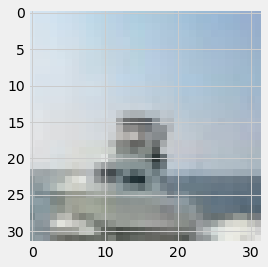

In [22]:
#checking some images

img=plt.imshow(x_train[100])

In [23]:
print(f"image label is {y_train[0]}")

image label is [6]


In [0]:
#creating a list to define names of images

class_list=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [25]:
print(f"this is a image of {class_list[y_train[100][0]]}")

this is a image of ship


In [0]:
#applying one hot encoding

y_train_one_hot= to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)

In [27]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
#changing the shape (as the colored images have RGB so the it will have 3 channels)

x_train=x_train/255
x_test=x_test/255

In [29]:
x_train[0].shape

(32, 32, 3)

In [30]:
y_train_one_hot[0].shape

(10,)

In [0]:
#Creating the model

model=Sequential()

model.add(Conv2D(32,(5,5),activation="relu",input_shape=(32,32,3)))


model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(5,5),activation="relu"))


model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())



model.add(Dense(512,activation="relu"))


model.add(Dropout(0.5))


model.add(Dense(128,activation="relu"))


model.add(Dropout(0.5))



model.add(Dense(10,activation="softmax"))

In [0]:
#Compiling
model.compile(optimizer="adam" , loss="categorical_crossentropy"  , metrics=["accuracy"])

In [63]:
#Fitting to train data

final_model=model.fit(x_train,y_train_one_hot, batch_size=500, epochs=20 ,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 3s 77us/step - loss: 1.9431 - accuracy: 0.2779 - val_loss: 1.5996 - val_accuracy: 0.4196
Epoch 2/20
45000/45000 [==============================] - 3s 68us/step - loss: 1.6049 - accuracy: 0.4124 - val_loss: 1.4075 - val_accuracy: 0.4842
Epoch 3/20
45000/45000 [==============================] - 3s 67us/step - loss: 1.4555 - accuracy: 0.4695 - val_loss: 1.3102 - val_accuracy: 0.5322
Epoch 4/20
45000/45000 [==============================] - 3s 68us/step - loss: 1.3606 - accuracy: 0.5099 - val_loss: 1.2301 - val_accuracy: 0.5598
Epoch 5/20
45000/45000 [==============================] - 3s 68us/step - loss: 1.2774 - accuracy: 0.5417 - val_loss: 1.1304 - val_accuracy: 0.5998
Epoch 6/20
45000/45000 [==============================] - 3s 68us/step - loss: 1.2014 - accuracy: 0.5724 - val_loss: 1.1157 - val_accuracy: 0.6092
Epoch 7/20
45000/45000 [==============================] - 3s 67us/ste

In [64]:
#Evaluating our model on test data

model.evaluate(x_test,y_test_one_hot)[1]

10000/10000 [==============================] - 1s 142us/step


0.7110000252723694

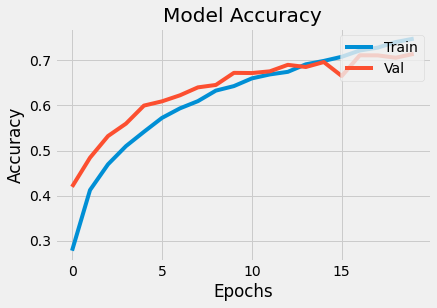

In [66]:
#Plotting the trend of model accuracy

plt.plot(final_model.history["accuracy"])
plt.plot(final_model.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"],loc="upper right")
plt.show()

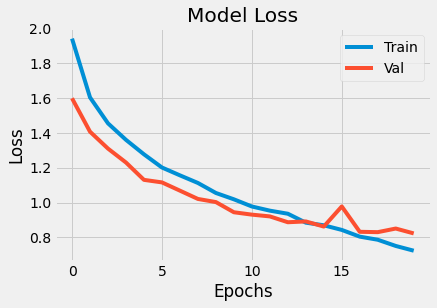

In [67]:
#Plotting the trend of model loss

plt.plot(final_model.history["loss"])
plt.plot(final_model.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Val"],loc="upper right")
plt.show()

In [92]:
#testing our model using a truck image called unnamed.jpg

from google.colab import files
uploaded = files.upload() 

Saving unnamed.jpg to unnamed.jpg


In [0]:
new_img=plt.imread("unnamed.jpg")

In [70]:
import skimage
from skimage.viewer import ImageViewer
from skimage.transform import resize

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Viewer requires Qt
  


In [0]:
resized_img=resize(new_img,(32,32,3))

In [0]:
prediction = model.predict(np.array([resized_img]))

In [0]:
result=prediction

In [0]:
#Creating a function to get the output

def fin_output(pred):
  l=[]
  for i in range(10):
    l.append(pred[0][i])
  output=max(l)
  ind= l.index(output)
  print(class_list[ind])


In [97]:
#Done!!

fin_output(result)

truck
